In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from pickle import dump
from pickle import load

## 1.loading data

In [3]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\archive (5)\student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 2.Data Cleaning

In [6]:
### data cleaning
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(25, 2)

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [10]:
data.duplicated().sum()

0

In [11]:
data.dropna(inplace=True)


## 3.Preprocessing data

In [22]:
x=data[["Hours"]] ##independent
y=data["Scores"] ##dependent

## 4.splitting data to train and test

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42) ##radom state is used toshow same valueswithout change to client when we share the file.


In [27]:
import warnings
warnings.filterwarnings("ignore")


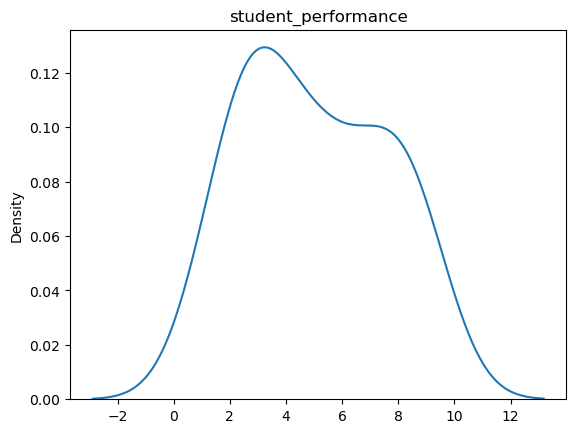

In [29]:
sns.distplot(x,hist=False)
plt.title("student_performance")
plt.show()

In [30]:
data["Hours"].skew()

0.1903382010052985

## 5.model building

In [34]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=model.predict(x_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

## 6.normality test/r square

In [39]:
r2_score=r2_score(y_test,y_pred)
r2_score

0.9678055545167994

In [41]:
mean_squared_error=mean_squared_error(y_test,y_pred)
mean_squared_error

18.943211722315272

## Step 7: Visualizing the Regression Line

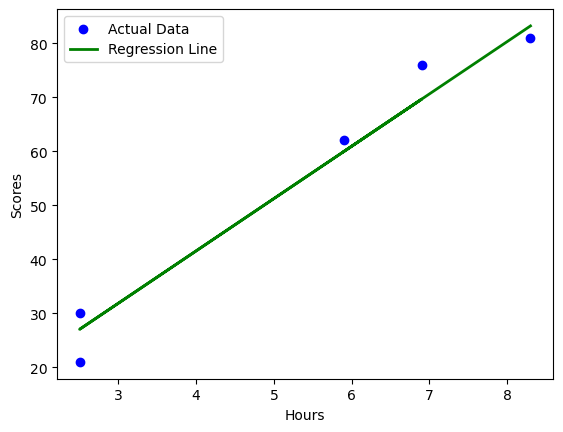

In [44]:


plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()


## 8.new data to test

In [47]:

new_data=pd.DataFrame({"Hours":[1,9,1,7]})
new_data

,Hours
0,1
1,9
2,1
3,7


In [49]:
y_pred=model.predict(new_data)
y_pred

array([12.50897051, 89.96559574, 12.50897051, 70.60143944])

In [51]:
new_data['Hours'].skew()

0.19973522061815654

## 9. Final model building

In [69]:
linear = LinearRegression()
linear.fit(x_train,y_train)
pred=linear.predict(x_test)
r2_score(y_test,pred)

0.9678055545167994

# 10.model dumping

In [61]:
import pickle

In [63]:
pickle.dump(model, open('linear.sav', 'wb'))

In [65]:
loaded_model =pickle.load(open('linear.sav', 'rb'))
result = loaded_model.score(x,y)
print(result)

0.9528345204324373
